In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
from agents import GecikmeliOrtam
del sys.modules['agents']
from agents import GecikmeliOrtam, GecikmeliUCB, GecikmeliThompson

In [3]:
ortam = GecikmeliOrtam('Ads_CTR_Optimisation.csv', geri_besleme_olasiligi=0.5)

In [4]:
ortam.goruntule(3)

{}

In [6]:
ortam = GecikmeliOrtam('Ads_CTR_Optimisation.csv', geri_besleme_olasiligi=0.01)

ajan = GecikmeliUCB(ortam.n_ads)
ru = []

for _ in range(10000):
    ajan.ogren(ortam)
    ru.append(ajan.toplam_odul())

display(pd.DataFrame(ajan.tablo).T.sum()[['Ni', 'Ri']].astype(int))

print("Gecikmeli UCB Ajan icin toplam odul:", ajan.toplam_odul())

Ni    9952
Ri    2386
dtype: int32

Gecikmeli UCB Ajan icin toplam odul: 2386


In [7]:
ortam = GecikmeliOrtam('Ads_CTR_Optimisation.csv', geri_besleme_olasiligi=0.01)

ajan = GecikmeliThompson(ortam.n_ads)
rt = []

for _ in range(10000):
    ajan.ogren(ortam)
    rt.append(ajan.toplam_odul())

display(pd.DataFrame(ajan.tablo).T.sum()[['Ni', 'Ri']].astype(int))

print("Gecikmeli Thompson Ajan icin toplam odul:", ajan.toplam_odul())

Ni    9970
Ri    2577
dtype: int32

Gecikmeli Thompson Ajan icin toplam odul: 2577


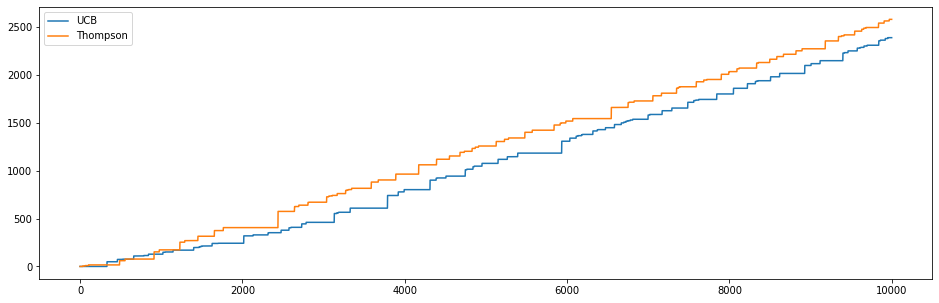

In [8]:
plt.figure(figsize=(16, 5))
plt.plot(ru, label='UCB')
plt.plot(rt, label='Thompson')
_ = plt.legend()

In [9]:
@interact
def rews(delay=(0., 3., 0.5)):
    delay = 10**(-delay)
    ortam = GecikmeliOrtam('Ads_CTR_Optimisation.csv', geri_besleme_olasiligi=delay)

    ajan = GecikmeliUCB(ortam.n_ads)
    ru = []

    for _ in range(10000):
        ajan.ogren(ortam)
        ru.append(ajan.toplam_odul())

#     display(pd.DataFrame(ajan.tablo).T.sum()[['Ni', 'Ri']].astype(int))

#     print("Gecikmeli UCB Ajan icin toplam odul:", ajan.toplam_odul())

    ortam = GecikmeliOrtam('Ads_CTR_Optimisation.csv', geri_besleme_olasiligi=delay)

    ajan = GecikmeliThompson(ortam.n_ads)
    rt = []

    for _ in range(10000):
        ajan.ogren(ortam)
        rt.append(ajan.toplam_odul())

#     display(pd.DataFrame(ajan.tablo).T.sum()[['Ni', 'Ri']].astype(int))

#     print("Gecikmeli Thompson Ajan icin toplam odul:", ajan.toplam_odul())

    plt.figure(figsize=(16, 5))
    plt.plot(ru, label='UCB')
    plt.plot(rt, label='Thompson')
    _ = plt.legend()

interactive(children=(FloatSlider(value=1.5, description='delay', max=3.0, step=0.5), Output()), _dom_classes=…